Accuracy: 0.82


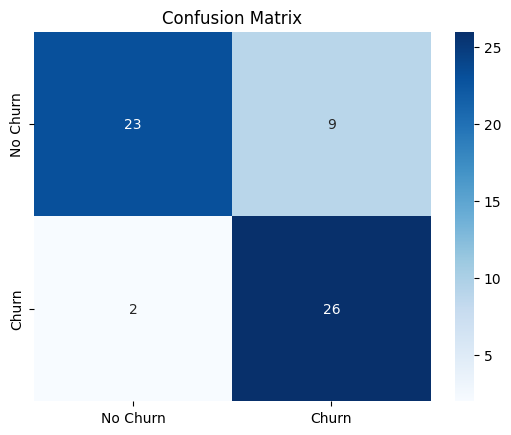

In [1]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate synthetic data (features: usage hours, plan type)
np.random.seed(0)
usage_hours = np.random.normal(50, 15, 200)  # Average usage hours per month
plan_type = np.random.choice([0, 1], size=200)  # 0 = Basic Plan, 1 = Premium Plan
churn = (usage_hours + plan_type * 30 + np.random.normal(0, 10, 200)) > 60  # Churn if usage > 60 hours

# Combine features
X = np.vstack((usage_hours, plan_type)).T
y = churn.astype(int)  # Convert boolean to 0/1

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.title("Confusion Matrix")
plt.show()


Intercept: 4.14
Coefficient: 2.80
Mean Squared Error: 0.65
R-squared Score: 0.81


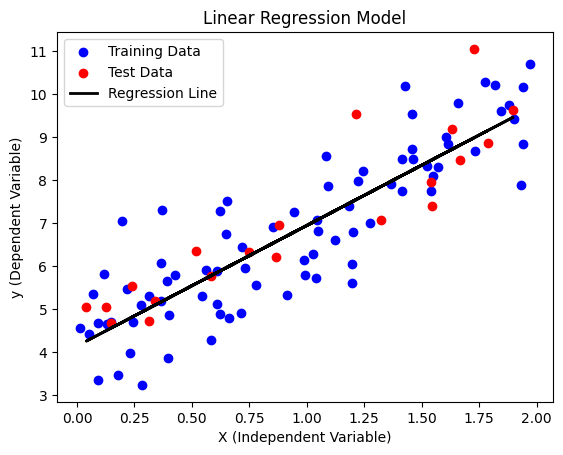

In [8]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. Generate synthetic data (X: independent variable, y: dependent variable)
np.random.seed(42)
X = 2 * np.random.rand(100, 1)  # 100 samples, 1 feature
y = 4 + 3 * X + np.random.randn(100, 1)  # y = 4 + 3X + noise

# 2. Split data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# 4. Print model parameters
print(f"Intercept: {model.intercept_[0]:.2f}")
print(f"Coefficient: {model.coef_[0][0]:.2f}")

# 5. Make predictions on test data
y_pred = model.predict(X_test)

# 6. Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")

# 7. Visualize the regression line
plt.scatter(X_train, y_train, color='blue', label="Training Data")
plt.scatter(X_test, y_test, color='red', label="Test Data")
plt.plot(X_test, y_pred, color='black', linewidth=2, label="Regression Line")

plt.xlabel("X (Independent Variable)")
plt.ylabel("y (Dependent Variable)")
plt.title("Linear Regression Model")
plt.legend()
plt.show()


In [5]:
import numpy as np

# Sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Mean Squared Error loss function and its derivative
def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

# Neural Network Class
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize the network parameters (weights and biases)
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        # Weights and biases for hidden layer and output layer
        self.W1 = np.random.randn(self.input_size, self.hidden_size)
        self.b1 = np.zeros((1, self.hidden_size))
        self.W2 = np.random.randn(self.hidden_size, self.output_size)
        self.b2 = np.zeros((1, self.output_size))

    def forward(self, X):
        # Forward pass through the network
        self.Z1 = np.dot(X, self.W1) + self.b1
        self.A1 = sigmoid(self.Z1)
        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        self.A2 = sigmoid(self.Z2)  # Output layer
        return self.A2

    def backward(self, X, y, learning_rate):
        # Backpropagation algorithm

        # Compute the error at the output layer
        output_error = self.A2 - y
        output_delta = output_error * sigmoid_derivative(self.A2)

        # Compute error at the hidden layer
        hidden_error = output_delta.dot(self.W2.T)
        hidden_delta = hidden_error * sigmoid_derivative(self.A1)

        # Update weights and biases for W2 and b2
        self.W2 -= self.A1.T.dot(output_delta) * learning_rate
        self.b2 -= np.sum(output_delta, axis=0, keepdims=True) * learning_rate

        # Update weights and biases for W1 and b1
        self.W1 -= X.T.dot(hidden_delta) * learning_rate
        self.b1 -= np.sum(hidden_delta, axis=0, keepdims=True) * learning_rate

    def train(self, X, y, epochs, learning_rate):
        # Training the network with backpropagation
        for epoch in range(epochs):
            output = self.forward(X)
            self.backward(X, y, learning_rate)
            if epoch % 1000 == 0:
                loss = mse_loss(y, output)
                print(f'Epoch {epoch}, Loss: {loss}')

    def predict(self, X):
        # Making predictions with the trained network
        return self.forward(X)

# Dataset: XOR problem (inputs and corresponding labels)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Input
y = np.array([[0], [1], [1], [0]])  # Target

# Initialize the neural network
input_size = 2   # 2 input features (for XOR problem)
hidden_size = 4  # Number of neurons in the hidden layer
output_size = 1  # Output layer has 1 neuron (binary classification)

# Create the neural network
nn = NeuralNetwork(input_size, hidden_size, output_size)

# Train the neural network
epochs = 10000  # Number of training iterations
learning_rate = 0.1  # Learning rate for gradient descent
nn.train(X, y, epochs, learning_rate)

# Test the network
predictions = nn.predict(X)
print("\nPredictions after training:")
print(predictions)

# Convert predictions to 0 or 1 by thresholding at 0.5
predicted_classes = (predictions > 0.5).astype(int)
print("\nPredicted classes (0 or 1):")
print(predicted_classes)

# Calculate accuracy
accuracy = np.mean(predicted_classes == y)
print("\nAccuracy:", accuracy)


Epoch 0, Loss: 0.2559348834501033
Epoch 1000, Loss: 0.24750440022434847
Epoch 2000, Loss: 0.23241183446279678
Epoch 3000, Loss: 0.19270544321143868
Epoch 4000, Loss: 0.11939848861525415
Epoch 5000, Loss: 0.04615773825967555
Epoch 6000, Loss: 0.020686023194741908
Epoch 7000, Loss: 0.011695924193013916
Epoch 8000, Loss: 0.007665638120641112
Epoch 9000, Loss: 0.0055156919472782425

Predictions after training:
[[0.07032028]
 [0.93897325]
 [0.9389642 ]
 [0.06710155]]

Predicted classes (0 or 1):
[[0]
 [1]
 [1]
 [0]]

Accuracy: 1.0
